In [1]:
from utils.util import *

## Change this string to '5sec' if you want to train a new model that uses all 5 seconds of raw data
## Change this string to '1sec' if you want to train a new model that uses 1 second slices of raw data

In [2]:
train_width = '5sec'

## This is NOT the raw data. It is each file summarized down into a single row if using the '5sec' model, or 5 rows if using the '1sec' model

In [3]:
df = pd.read_csv(f'../data/complex_mafaulda_{train_width}.csv')
df.head()

,axialUnderhang-Entropy,axialUnderhang-Kurtosis,axialUnderhang-Mean,axialUnderhang-F,axialUnderhang-2F,axialUnderhang-3F,axialOverhang-Entropy,axialOverhang-Kurtosis,axialOverhang-Mean,axialOverhang-F,...,microphone-Mean,microphone-F,microphone-2F,microphone-3F,tachometerSignal-Entropy,tachometerSignal-Kurtosis,tachometerSignal-Mean,fundamentalFrequency,class,path
0,11.700423,-0.028423,0.009096,0.209861,0.089478,0.081119,11.251919,0.144682,0.004352,0.020866,...,0.011994,0.028085,0.006391,0.022628,10.081655,1.920819,0.000409,60.6,vertical-misalignment,full/vertical-misalignment/1.78mm/62.0544.csv
1,11.691405,-0.315841,0.009299,0.171966,0.080338,0.063176,11.453312,0.634057,0.018882,0.015441,...,0.011745,0.025441,0.006911,0.024714,10.098573,2.051371,0.001856,59.2,vertical-misalignment,full/vertical-misalignment/1.78mm/60.6208.csv
2,11.691603,-0.314269,0.008901,0.167616,0.196603,0.045823,11.107915,0.434333,-0.011894,0.031162,...,0.011845,0.032116,0.021273,0.017417,10.207887,2.071535,-0.001486,58.6,vertical-misalignment,full/vertical-misalignment/1.78mm/60.0064.csv
3,11.715946,-0.040901,0.008365,0.172601,0.067104,0.116394,11.246643,0.829039,0.005535,0.022489,...,0.012393,0.027578,0.006499,0.020195,10.088735,2.064658,-0.001532,57.2,vertical-misalignment,full/vertical-misalignment/1.78mm/58.5728.csv
4,11.713568,-0.129168,0.008913,0.164138,0.064997,0.150388,11.184626,-0.092772,0.009297,0.017579,...,0.012543,0.025544,0.007792,0.023317,10.097232,2.038316,-0.000936,56.0,vertical-misalignment,full/vertical-misalignment/1.78mm/57.344.csv


In [4]:
# make our class dictionary
keys = list(np.unique(df['class']))
codes = [int(_) for _ in np.arange(0,len(keys))]
classDict = dict(zip(keys,codes))

df['CLASS'] = df['class']
df['class'] = df['class'].map(classDict)

classDict

{'horizontal-misalignment': 0,
 'imbalance': 1,
 'normal': 2,
 'overhang': 3,
 'underhang': 4,
 'vertical-misalignment': 5}

In [5]:
drop = ['class','path','CLASS']
if 'startPoint' in df:
    drop.append('startPoint')
X = df.drop(columns=drop)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    shuffle=True, random_state=45,
                                                    stratify=None)

print(f'Length of train set: {len(X_train)}')
print(f'Length of test set: {len(X_test)}')

Length of train set: 1560
Length of test set: 391


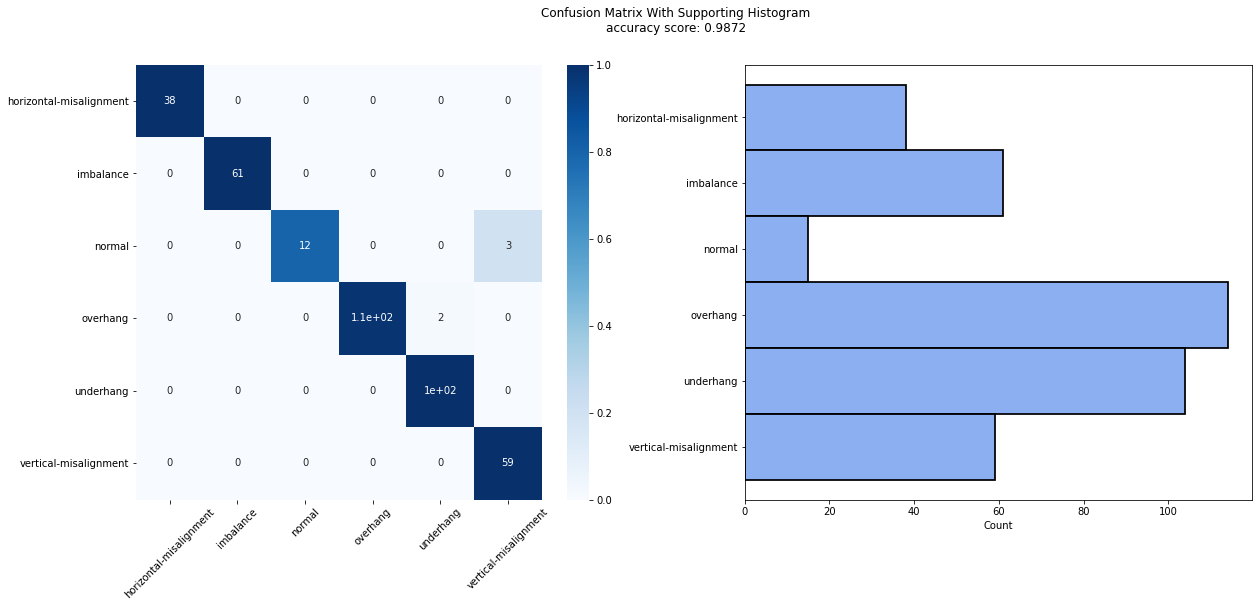

In [6]:
# used by the confusion_hist_plot function
target = 'class'

# define the model
model = RandomForestClassifier()

# train the model
model.fit(X_train, y_train)

# try to predict the data points we set aside for testing
preds = model.predict(X_test)

#plot our results
confusion_hist_plot(df=df,y_test=y_test,preds=preds,codes=classDict);

# save the model
# joblib.dump(model, f'./models/rfc_{train_width}.joblib')

In [7]:
# These indices tell us which files we will need to pull from to re-summarize subsamples of the data for
# our sliding window
idxs = X_test.index
idxs = [int(_) for _ in idxs]

val_files = df[['path','class','CLASS']].iloc[idxs]
val_files.head()
# val_files.to_csv(f'./utils/test_files_{train_width}.csv')

,path,class,CLASS
1420,full/normal/29.4912.csv,2,normal
1402,full/normal/47.7184.csv,2,normal
1481,full/overhang/ball_fault/0g/61.44.csv,3,overhang
355,full/underhang/ball_fault/0g/56.5248.csv,4,underhang
1579,full/overhang/outer_race/6g/57.5488.csv,3,overhang
